In [1]:
!pip install git+https://github.com/openai/whisper.git -q
!pip install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [8]:
import yt_dlp
import os

def download_audio_with_custom_name(youtube_url, output_name):

    current_directory = os.getcwd()


    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],

        'outtmpl': os.path.join(current_directory, f'{output_name}.mp3'),
        'noplaylist': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            print(f"Downloading audio from: {youtube_url}")
            ydl.download([youtube_url])
            print(f"Downloaded audio saved as: {output_name}.mp3 in {current_directory}")
    except Exception as e:
        print(f"Error: {e}")

# Example usage
youtube_url = input("Enter the YouTube video URL: ")
output_name = input("Enter the custom name for the audio file (without extension): ")
download_audio_with_custom_name(youtube_url, output_name)


Enter the YouTube video URL: https://www.youtube.com/watch?v=NT2H9iyd-ms&ab_channel=WGNNews
Enter the custom name for the audio file (without extension): fed_meeting
[youtube] Extracting URL: https://www.youtube.com/watch?v=NT2H9iyd-ms&ab_channel=WGNNews
[youtube] NT2H9iyd-ms: Downloading webpage
[youtube] NT2H9iyd-ms: Downloading ios player API JSON
[youtube] NT2H9iyd-ms: Downloading web creator player API JSON
[youtube] NT2H9iyd-ms: Downloading player 5f8f5b0f
[youtube] NT2H9iyd-ms: Downloading m3u8 information
[info] NT2H9iyd-ms: Downloading 1 format(s): 251
[download] Destination: /Users/murli/Desktop/Fed Speech Recognition/fed_meeting.mp3
[download] 100% of   47.78MiB in 00:00:09 at 4.99MiB/s     


ERROR: Postprocessing: ffprobe and ffmpeg not found. Please install or provide the path using --ffmpeg-location


Error: ERROR: Postprocessing: ffprobe and ffmpeg not found. Please install or provide the path using --ffmpeg-location


In [3]:
import whisper
model = whisper.load_model('base')

In [22]:
!ffmpeg -ss 378 -i fed_meeting.mp4 -t 2715 fed_meeting_trimmed.mp4

ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

In [23]:
import datetime


t1 = datetime.datetime.now()
print(f"started at {t1}")


output = model.transcribe("fed_meeting_trimmed.mp3")


t2 = datetime.datetime.now()
print(f"ended at {t2}")
print(f"time elapsed: {t2 - t1}")

started at 2024-09-08 05:21:25.970120


/Users/murli/anaconda3/lib/python3.10/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


ended at 2024-09-08 05:27:12.315109
time elapsed: 0:05:46.344989


In [24]:
output['text']

" Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of policy for s

In [169]:
for segment in output['segments']:
  print(segment["text"])
  second = int(segment['start'])
  second = second - (second % 5)
  print(second)

 Good afternoon.
0
 My colleagues and I are strongly committed to bringing inflation back down to our 2% goal.
0
 We have both the tools that we need and the resolve it will take to restore price stability
5
 on behalf of American families and businesses.
10
 Price stability is the responsibility of the Federal Reserve and serves as the bedrock
15
 of our economy.
20
 Without price stability, the economy does not work for anyone.
20
 In particular, without price stability, we will not achieve a sustained period of strong
25
 labor market conditions that benefit all.
30
 Today the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate
35
 that ongoing increases will be appropriate.
40
 We are moving our policy stance purposefully to a level that will be sufficiently restrictive
45
 to return inflation to 2%.
45
 In addition, we are continuing the process of significantly reducing the size of our balance
50
 sheet.
55
 Restoring price stability will likely 

In [170]:
import pandas as pd
import requests

url = "https://gist.githubusercontent.com/hackingthemarkets/c6ca7834d2af4932e3ab0d847679c14e/raw/b28fde61c41465565042d75fb2438adc9684d77b/spy.csv"
spy = pd.read_csv(url)

In [171]:
spy

,date,open,high,low,close,volume,average,barCount
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130
...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139


In [177]:
for segment in output['segments']:
   second = int(segment['start'])
   second = second - (second % 5)
   spy.loc[second / 5, 'text'] = segment['text']

In [178]:
spy

,date,open,high,low,close,volume,average,barCount,text
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,My colleagues and I are strongly committed to...
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,on behalf of American families and businesses.
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not..."
...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,"At the same time, now you see services inflat..."
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,"And, um, I, I just think that the inflation p..."
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,over the course of this year without a question.
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,"That means that we have to, uh, have policy b..."


In [179]:
spy['percent'] = ((spy['close'] - spy['open']) / spy['open']) * 100
spy

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,My colleagues and I are strongly committed to...,-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,on behalf of American families and businesses.,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,"At the same time, now you see services inflat...",0.023666
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,"And, um, I, I just think that the inflation p...",0.021032
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,over the course of this year without a question.,-0.015771
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,"That means that we have to, uh, have policy b...",-0.005258


In [180]:
big_downmoves = spy[spy.percent < -0.2]
big_downmoves

,date,open,high,low,close,volume,average,barCount,text,percent
61,2022-11-02 14:36:20,387.74,387.84,386.42,386.45,214600.0,387.037,1225,and the lags with which monetary policy affec...,-0.332697
62,2022-11-02 14:36:25,386.40,386.44,385.36,385.52,289403.0,385.919,1731,"At some point, as I've said in the last two p...",-0.227743
78,2022-11-02 14:37:45,383.70,383.70,382.90,382.93,152778.0,383.279,805,We will stay the course until the job is done.,-0.200678
93,2022-11-02 14:39:00,383.67,383.69,382.82,382.83,64429.0,383.275,405,How will we know that we've reached that level?,-0.218938
154,2022-11-02 14:44:05,385.86,385.87,385.07,385.08,73029.0,385.440,486,NaN,-0.202146


In [45]:
!pip install mplfinance -q
import mplfinance as mpf

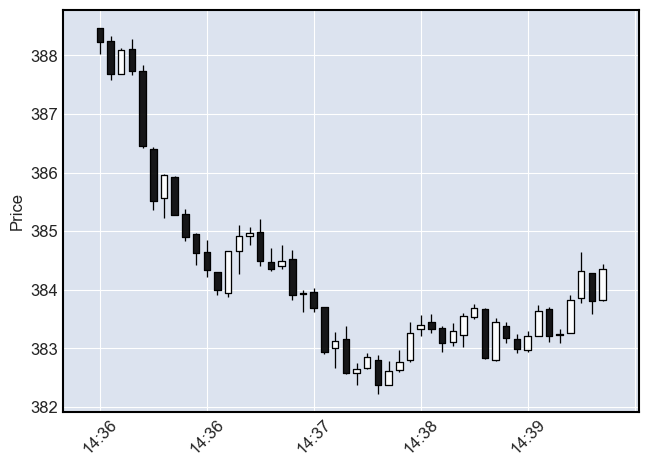

In [181]:
df = spy.copy()


df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 
                   'volume': 'Volume'}, inplace=True)


df.index = pd.DatetimeIndex(df['date'])


df_selected = df['2022-11-02 14:36':'2022-11-02 14:39']


mpf.plot(df_selected, type='candle')


In [196]:
spy[57:95][["text","percent"]]

,text,percent
date,,
2022-11-02 14:36:00,as housing.,-0.059208
2022-11-02 14:36:05,"It will take time, however, for the full effe...",-0.141665
2022-11-02 14:36:10,That's why we say in our statement that in de...,0.105755
2022-11-02 14:36:15,"the target range, we will take into account t...",-0.095334
2022-11-02 14:36:20,and the lags with which monetary policy affec...,-0.332697
2022-11-02 14:36:25,"At some point, as I've said in the last two p...",-0.227743
2022-11-02 14:36:30,"to slow the pace of increases, as we approach...",0.103745
2022-11-02 14:36:35,restrictive to bring inflation down to our 2%...,-0.168429
2022-11-02 14:36:40,There is significant uncertainty around that ...,-0.103818


In [183]:
big_downmoves = spy[spy.percent < -0.1]
big_downmoves

,date,open,high,low,close,volume,average,barCount,text,percent
10,2022-11-02 14:32:05,386.52,386.52,386.02,386.04,49679.0,386.291,240,"In addition, we are continuing the process of...",-0.124185
58,2022-11-02 14:36:05,388.24,388.34,387.58,387.69,93311.0,387.940,520,"It will take time, however, for the full effe...",-0.141665
61,2022-11-02 14:36:20,387.74,387.84,386.42,386.45,214600.0,387.037,1225,and the lags with which monetary policy affec...,-0.332697
62,2022-11-02 14:36:25,386.40,386.44,385.36,385.52,289403.0,385.919,1731,"At some point, as I've said in the last two p...",-0.227743
64,2022-11-02 14:36:35,385.92,385.94,385.27,385.27,155739.0,385.522,906,restrictive to bring inflation down to our 2%...,-0.168429
65,2022-11-02 14:36:40,385.29,385.37,384.83,384.89,174910.0,385.113,1080,There is significant uncertainty around that ...,-0.103818
72,2022-11-02 14:37:15,384.98,385.20,384.41,384.48,183625.0,384.852,664,Our overarching focus is using our tools to b...,-0.129877
75,2022-11-02 14:37:30,384.52,384.68,383.83,383.91,105270.0,384.234,542,Restoring price stability is essential to set...,-0.158639
78,2022-11-02 14:37:45,383.70,383.70,382.90,382.93,152778.0,383.279,805,We will stay the course until the job is done.,-0.200678
80,2022-11-02 14:37:55,383.15,383.38,382.55,382.58,138789.0,383.012,544,We at the Fed will do everything we can to ac...,-0.148767


In [184]:
big_upmoves = spy[spy.percent > 0.15]
big_upmoves

,date,open,high,low,close,volume,average,barCount,text,percent
54,2022-11-02 14:35:45,387.56,388.19,387.56,388.16,148005.0,388.015,823,be appropriate in order to attain a stance of...,0.154815
69,2022-11-02 14:37:00,383.94,384.66,383.87,384.66,158312.0,384.183,856,We will continue to make our decisions meetin...,0.187529
94,2022-11-02 14:39:05,382.79,383.52,382.78,383.44,41307.0,383.129,244,guided by our assessment of how much financia...,0.169806
123,2022-11-02 14:41:30,383.53,384.97,383.37,384.92,151834.0,384.114,1044,NaN,0.362423
125,2022-11-02 14:41:40,384.80,385.57,384.45,385.41,138176.0,384.916,938,NaN,0.158524
130,2022-11-02 14:42:05,385.80,386.50,385.66,386.50,83841.0,386.092,511,It is likely we'll have a discussion about th...,0.181441
214,2022-11-02 14:49:05,383.80,384.42,383.80,384.41,43954.0,384.154,290,I guess the thing I would say is highly uncer...,0.158937
274,2022-11-02 14:54:05,379.18,379.80,379.00,379.78,83397.0,379.374,541,And I'm just curious to what extent you do an...,0.158236


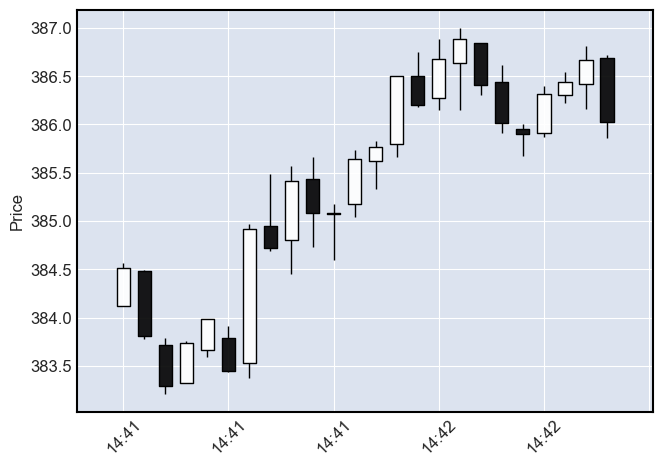

In [185]:
mpf.plot(df["2022-11-02 14:41":"2022-11-02 14:42"], type='candle')

In [186]:
spy[110:140][["date","text","percent"]]

,date,text,percent
110,2022-11-02 14:40:25,We've moved three and three quarters percent ...,0.130049
111,2022-11-02 14:40:30,It's a historically fast pace and that's cert...,-0.036368
112,2022-11-02 14:40:35,"So now we come to the second question, which ...",-0.031186
113,2022-11-02 14:40:40,And we're saying that we'd raise that rate to...,0.031196
114,2022-11-02 14:40:45,over time.,-0.067562
115,2022-11-02 14:40:50,And we put that into our post-meeting stateme...,0.000000
116,2022-11-02 14:40:55,And that's how far to go and I'll talk more a...,-0.111816
117,2022-11-02 14:41:00,We think there's some ground to cover before ...,0.101531
118,2022-11-02 14:41:05,"And as I mentioned, incoming data between the...",-0.174261
119,2022-11-02 14:41:10,NaN,-0.112061


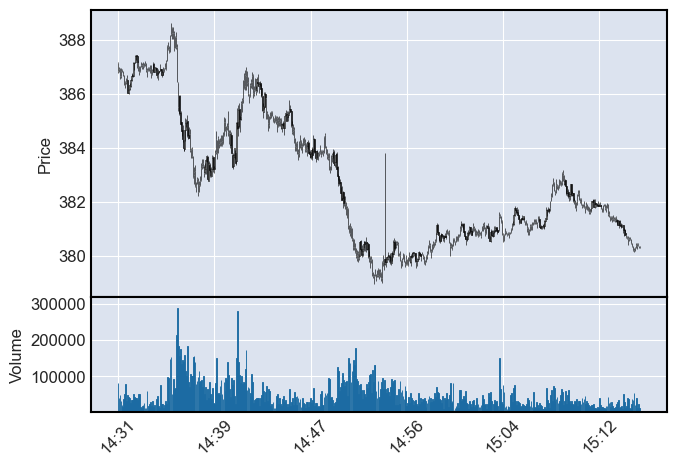

In [187]:
mpf.plot(df["2022-11-02 14:31:15":"2022-11-02 15:16:25"], type='candle', volume=True)

In [188]:
spy

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,My colleagues and I are strongly committed to...,-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,on behalf of American families and businesses.,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,"At the same time, now you see services inflat...",0.023666
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,"And, um, I, I just think that the inflation p...",0.021032
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,over the course of this year without a question.,-0.015771
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,"That means that we have to, uh, have policy b...",-0.005258


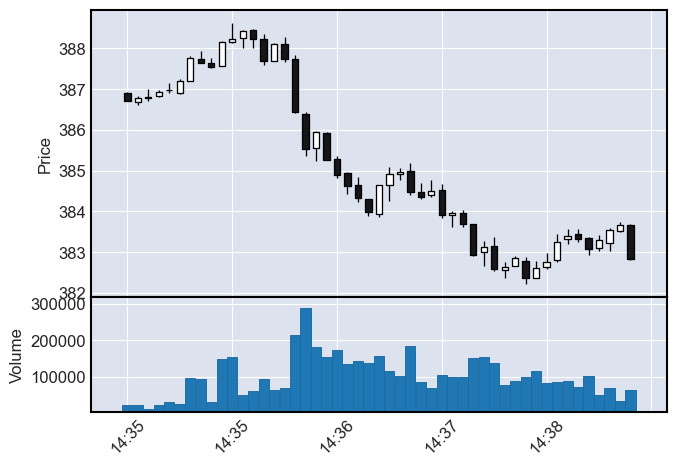

In [189]:
mpf.plot(df["2022-11-02 14:35:00":"2022-11-02 14:39:00"], type='candle', volume=True)

In [190]:
spy['date'] = pd.to_datetime(spy['date'])
spy.set_index('date', inplace=True)

In [191]:
df_selected = spy["2022-11-02 14:35:00":"2022-11-02 14:39:00"]


start_time = df_selected.index.min()
end_time = df_selected.index.max()


combined_text = " ".join(df_selected['text'].dropna())


print(f"Timeframe: {start_time} to {end_time}\n")
print(combined_text)


Timeframe: 2022-11-02 14:35:00 to 2022-11-02 14:39:00

 It is as it erodes purchasing power, especially for those least able to meet the higher costs  of essentials like food, housing and transportation.  We are highly attentive to the risks that high inflation poses to both sides of our mandate,  and we're strongly committed to returning inflation to our 2% objective.  by 75 basis points.  And we are continuing the process of significantly reducing the size of our balance sheet, which  plays an important role in forming the stance of monetary policy.  With today's action, we've raised interest rates by three and three quarters percentage  We anticipate that ongoing increases in the target range for the federal funds rate will  be appropriate in order to attain a stance of monetary policy that is sufficiently restrictive  to return inflation to 2% over time.  Financial conditions have tightened significantly in response to our policy actions, and we are  as housing.  It will take time,

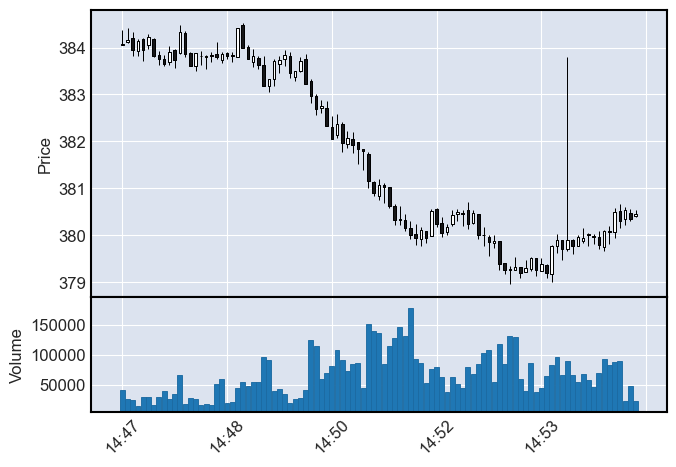

In [192]:
mpf.plot(df["2022-11-02 14:47:15":"2022-11-02 14:55:25"], type='candle', volume=True)

In [193]:
df_selected = spy["2022-11-02 14:47":"2022-11-02 14:55"]


start_time = df_selected.index.min()
end_time = df_selected.index.max()


combined_text = " ".join(df_selected['text'].dropna())


print(f"Timeframe: {start_time} to {end_time}\n")
print(combined_text)

Timeframe: 2022-11-02 14:47:00 to 2022-11-02 14:55:55

 And we don't have a clearly identified scientific way of understanding at what point inflation becomes entrenched.  And so the thing we need to do from a risk management standpoint is to use our tools forcefully, but  thoughtfully, and get inflation under control, get it down to 2% get it behind us.  That's what we really need to do and what we're strongly committed to doing.  Rachel.  Thank you for taking your questions.  I'm wondering if you can walk us through how you judge those lag effects.  What that timeline looks like over the coming months or even a year and where you would expect it to show up in different parts of the economy.  I mean, the way I would think about that is it's, you know, it's a commonly for a long time thought that monetary policy works with long and variable legs.  And that it works first on financial conditions and then on economic activity and then perhaps later than that even on inflation.  There was

In [198]:
spy.to_csv('fed_meeting_transcribed.csv')